Pandas Tutorial

In [1713]:
import pandas as pd
import random
import numpy as np

In [1714]:
df=pd.DataFrame({'Student': {0: 'Amar', 1: 'Akbar', 2: 'Anthony'},
                   'Maths': {0: 4, 1: 5, 2: 6},
                   'Hindi': {0: 8, 1: 9, 2: 10}})
df

,Student,Maths,Hindi
0,Amar,4,8
1,Akbar,5,9
2,Anthony,6,10


Melt

In [1715]:
pd.melt(df,id_vars=['Student'],value_vars=['Maths'])

,Student,variable,value
0,Amar,Maths,4
1,Akbar,Maths,5
2,Anthony,Maths,6


In [1716]:
pd.melt(df,id_vars=['Student'],value_vars=['Maths', 'Hindi'])

,Student,variable,value
0,Amar,Maths,4
1,Akbar,Maths,5
2,Anthony,Maths,6
3,Amar,Hindi,8
4,Akbar,Hindi,9
5,Anthony,Hindi,10


In [1717]:
pd.melt(df,id_vars='Student',var_name='Subject',value_name='Marks out of 10')

,Student,Subject,Marks out of 10
0,Amar,Maths,4
1,Akbar,Maths,5
2,Anthony,Maths,6
3,Amar,Hindi,8
4,Akbar,Hindi,9
5,Anthony,Hindi,10


Pivot

In [1718]:
pd.pivot(df,columns='Student')['Hindi']

Student,Akbar,Amar,Anthony
0,NaN,8.0,NaN
1,9.0,NaN,NaN
2,NaN,NaN,10.0


In [1719]:
df["Event"]=["Anhoni","Honi","Anhoni"]

In [1720]:
pd.pivot(df,index="Event",columns='Student')

Maths              Hindi             
Student Akbar Amar Anthony Akbar Amar Anthony
Event                                        
Anhoni    NaN  4.0     6.0   NaN  8.0    10.0
Honi      5.0  NaN     NaN   9.0  NaN     NaN

In [1721]:
pd.pivot(df,index="Event",columns='Student',values=['Hindi','Maths'])

Hindi              Maths             
Student Akbar Amar Anthony Akbar Amar Anthony
Event                                        
Anhoni    NaN  8.0    10.0   NaN  4.0     6.0
Honi      9.0  NaN     NaN   5.0  NaN     NaN

In [1722]:
df["Attendance_Probability"]=[1,0.4,0.6]
df["Joint_Probability"]=[0.24,0.24,0.24]

In [1723]:
pd.pivot(df,index="Joint_Probability",columns=["Maths",'Hindi'], values="Event")

Maths,4,5,6
Hindi,8,9,10
Joint_Probability,,,
0.24,Anhoni,Honi,Anhoni


In [1724]:
# Asad k to maze a gaye

Pivot Table

In [1725]:
pd.pivot_table(df,index=["Joint_Probability","Attendance_Probability"],columns=["Student"], values=["Maths"],

                aggfunc={"Maths":"sum"})

Maths             
Student                                  Akbar Amar Anthony
Joint_Probability Attendance_Probability                   
0.24              0.4                      5.0  NaN     NaN
                  0.6                      NaN  NaN     6.0
                  1.0                      NaN  4.0     NaN

In [1726]:
data={
    'Student': ['Amar', 'Akbar', 'Anthony', 'Amar', 'Akbar', 'Anthony', 'Amar', 'Akbar', 'Anthony'],
    'Maths':[4, 5, 6, 7, 3, 4, 6, 2, 5],
    'Hindi':[8, 9, 10, 7, 6, 9, 9, 5, 8],
    'Event':random.choices(['Honi', 'Anhoni'], k=9),
    'Attendance_Probability': [1.0, 0.4, 0.6, 0.5, 0.4, 0.2, 0.7, 0.3, 0.4],
    'Joint_Probability': [0.24,0.24,0.24,0.084,0.084,0.084,0.04,0.04,0.04],
    'Year':[1980,1980,1980,1990,1990,1990,2000,2000,2000]
}
df = pd.DataFrame(data)
pd.pivot_table(df,index=["Joint_Probability","Year"],columns=["Student"], values=["Maths"],
                aggfunc={"Maths":"sum"}).sort_index()
df

,Student,Maths,Hindi,Event,Attendance_Probability,Joint_Probability,Year
0,Amar,4,8,Anhoni,1.0,0.240,1980
1,Akbar,5,9,Anhoni,0.4,0.240,1980
2,Anthony,6,10,Anhoni,0.6,0.240,1980
3,Amar,7,7,Anhoni,0.5,0.084,1990
4,Akbar,3,6,Anhoni,0.4,0.084,1990
5,Anthony,4,9,Honi,0.2,0.084,1990
6,Amar,6,9,Honi,0.7,0.040,2000
7,Akbar,2,5,Honi,0.3,0.040,2000
8,Anthony,5,8,Anhoni,0.4,0.040,2000


In [1727]:
pd.pivot_table(df,index=["Joint_Probability","Year"],columns=["Student"], values=["Maths"],
                aggfunc={"Maths":"sum"}).sort_index()

Maths             
Student                Akbar Amar Anthony
Joint_Probability Year                   
0.040             2000     2    6       5
0.084             1990     3    7       4
0.240             1980     5    4       6

Crosstab

In [1728]:
data = [
    {"Movie": "Kaala Patthar", "Year": 1979, "Actor": "Amitabh Bachchan", "ScreenTime": 90},
    {"Movie": "Kaala Patthar", "Year": 1979, "Actor": "Shatrughan Sinha", "ScreenTime": 60},
    {"Movie": "Dostana", "Year": 1980, "Actor": "Amitabh Bachchan", "ScreenTime": 100},
    {"Movie": "Dostana", "Year": 1980, "Actor": "Shatrughan Sinha", "ScreenTime": 50},
    {"Movie": "Shaan", "Year": 1980, "Actor": "Amitabh Bachchan", "ScreenTime": 80},
    {"Movie": "Shaan", "Year": 1980, "Actor": "Shatrughan Sinha", "ScreenTime": 60},
    {"Movie": "Coolie", "Year": 1983, "Actor": "Amitabh Bachchan", "ScreenTime": 120},
    {"Movie": "Bombay to Goa", "Year": 1972, "Actor": "Amitabh Bachchan", "ScreenTime": 85},
    {"Movie": "Bombay to Goa", "Year": 1972, "Actor": "Shatrughan Sinha", "ScreenTime": 20},  # Minor role
    {"Movie": "Ganga Jamuna Saraswati", "Year": 1988, "Actor": "Amitabh Bachchan", "ScreenTime": 95},
    {"Movie": "Ganga Jamuna Saraswati", "Year": 1988, "Actor": "Shatrughan Sinha", "ScreenTime": 70}
]
df = pd.DataFrame(data)
pd.crosstab(df['Year'], df['Actor'], values=df['ScreenTime'], aggfunc='sum', margins=True)

Actor,Amitabh Bachchan,Shatrughan Sinha,All
Year,,,
1972,85.0,20.0,105
1979,90.0,60.0,150
1980,180.0,110.0,290
1983,120.0,NaN,120
1988,95.0,70.0,165
All,570.0,260.0,830


In [1729]:
pd.crosstab(df['Movie'], df['Actor'])

Actor,Amitabh Bachchan,Shatrughan Sinha
Movie,,
Bombay to Goa,1,1
Coolie,1,0
Dostana,1,1
Ganga Jamuna Saraswati,1,1
Kaala Patthar,1,1
Shaan,1,1


Cut

In [1730]:
df["Importance"]=pd.cut(df["ScreenTime"],bins=5,ordered=True,labels=range(0,5))

In [1731]:
df[["Importance","ScreenTime"]]

,Importance,ScreenTime
0,3,90
1,1,60
2,3,100
3,1,50
4,2,80
5,1,60
6,4,120
7,3,85
8,0,20
9,3,95


In [1732]:
df["Importance"].dtype

CategoricalDtype(categories=range(0, 5), ordered=True, categories_dtype=int64)

Qcut

In [1733]:
df["QImportance"]=pd.qcut(df["ScreenTime"],q=4,labels=range(0, 4))

In [1734]:
df[["QImportance","Importance"]]

,QImportance,Importance
0,2,3
1,0,1
2,3,3
3,0,1
4,1,2
5,0,1
6,3,4
7,2,3
8,0,0
9,3,3


Merge

In [1735]:
df_movies = pd.DataFrame([
    {"Movie": "Kaala Patthar", "Year": 1979},
    {"Movie": "Dostana", "Year": 1980},
    {"Movie": "Shaan", "Year": 1980},
    {"Movie": "Coolie", "Year": 1983},
    {"Movie": "Bombay to Goa", "Year": 1972},
    {"Movie": "Ganga Jamuna Saraswati", "Year": 1988}
])
df_cast = pd.DataFrame([
    {"Movie": "Kaala Patthar", "Actor": "Amitabh Bachchan", "ScreenTime": 90},
    {"Movie": "Kaala Patthar", "Actor": "Shatrughan Sinha", "ScreenTime": 60},
    {"Movie": "Dostana", "Actor": "Amitabh Bachchan", "ScreenTime": 100},
    {"Movie": "Dostana", "Actor": "Shatrughan Sinha", "ScreenTime": 50},
    {"Movie": "Shaan", "Actor": "Amitabh Bachchan", "ScreenTime": 80},
    {"Movie": "Coolie", "Actor": "Amitabh Bachchan", "ScreenTime": 120},
    {"Movie": "Bombay to Goa", "Actor": "Shatrughan Sinha", "ScreenTime": 20},
    {"Movie": "Ganga Jamuna Saraswati", "Actor": "Amitabh Bachchan", "ScreenTime": 95},
])

In [1736]:
df_merged = pd.merge(df_cast, df_movies, on="Movie", how="left")
df_merged

,Movie,Actor,ScreenTime,Year
0,Kaala Patthar,Amitabh Bachchan,90,1979
1,Kaala Patthar,Shatrughan Sinha,60,1979
2,Dostana,Amitabh Bachchan,100,1980
3,Dostana,Shatrughan Sinha,50,1980
4,Shaan,Amitabh Bachchan,80,1980
5,Coolie,Amitabh Bachchan,120,1983
6,Bombay to Goa,Shatrughan Sinha,20,1972
7,Ganga Jamuna Saraswati,Amitabh Bachchan,95,1988


In [1737]:
#| if one had Movie_name instead of Movie? 
# df_merged = pd.merge(
#     df_cast, df_movies,
#     left_on="Movie", right_on="Movie_name",
#     how="left"
# )
# df_merged = df_merged.drop(columns="Movie_name")

Merge Ordered

In [1738]:
df_movies = pd.DataFrame({
    "Year": [1972, 1979, 1980, 1983, 1988],
    "Movie": ["Bombay to Goa", "Kaala Patthar", "Dostana", "Coolie", "Ganga Jamuna Saraswati"]
})
df_boxoffice = pd.DataFrame({
    "Year": [1972, 1980, 1983],
    "BoxOffice": [5.5, 8.0, 9.5]
})
pd.merge_ordered(df_movies, df_boxoffice, on="Year", how="left")

,Year,Movie,BoxOffice
0,1972,Bombay to Goa,5.5
1,1979,Kaala Patthar,NaN
2,1980,Dostana,8.0
3,1983,Coolie,9.5
4,1988,Ganga Jamuna Saraswati,NaN


In [1739]:
pd.merge_ordered(df_movies, df_boxoffice, on="Year", how="left", fill_method="ffill")

,Year,Movie,BoxOffice
0,1972,Bombay to Goa,5.5
1,1979,Kaala Patthar,5.5
2,1980,Dostana,8.0
3,1983,Coolie,9.5
4,1988,Ganga Jamuna Saraswati,9.5


Merge Asof

In [1740]:
df_movies = pd.DataFrame({
    "ReleaseDate": pd.to_datetime(["1972-02-01", "1979-06-15", "1980-08-01", "1983-05-01", "1988-12-01"]),
    "Movie": ["Bombay to Goa", "Kaala Patthar", "Dostana", "Coolie", "Ganga Jamuna Saraswati"]
})
df_boxoffice = pd.DataFrame({
    "ReportDate": pd.to_datetime(["1972-01-01", "1980-01-01", "1983-01-01"]),
    "BoxOffice": [5.5, 8.0, 9.5]
})
df_merged = pd.merge_asof(
    df_movies.sort_values("ReleaseDate"),
    df_boxoffice.sort_values("ReportDate"),
    left_on="ReleaseDate",
    right_on="ReportDate",
    direction="forward"
)
df_merged

,ReleaseDate,Movie,ReportDate,BoxOffice
0,1972-02-01,Bombay to Goa,1980-01-01,8.0
1,1979-06-15,Kaala Patthar,1980-01-01,8.0
2,1980-08-01,Dostana,1983-01-01,9.5
3,1983-05-01,Coolie,NaT,NaN
4,1988-12-01,Ganga Jamuna Saraswati,NaT,NaN


In [1741]:
df_merged = pd.merge_asof(
    df_movies.sort_values("ReleaseDate"),
    df_boxoffice.sort_values("ReportDate"),
    left_on="ReleaseDate",
    right_on="ReportDate",
    direction="backward"
)
df_merged

,ReleaseDate,Movie,ReportDate,BoxOffice
0,1972-02-01,Bombay to Goa,1972-01-01,5.5
1,1979-06-15,Kaala Patthar,1972-01-01,5.5
2,1980-08-01,Dostana,1980-01-01,8.0
3,1983-05-01,Coolie,1983-01-01,9.5
4,1988-12-01,Ganga Jamuna Saraswati,1983-01-01,9.5


Concat

In [1742]:
df1 = pd.DataFrame({
    "Movie": ["Kaala Patthar", "Dostana"],
    "Actor": ["Amitabh Bachchan", "Amitabh Bachchan"],
    "ScreenTime": [90, 100]
})
df2 = pd.DataFrame({
    "Movie": ["Shaan", "Coolie"],
    "Actor": ["Amitabh Bachchan", "Amitabh Bachchan"],
    "ScreenTime": [80, 120]
})
pd.concat([df1, df2],axis=0,ignore_index=True)

,Movie,Actor,ScreenTime
0,Kaala Patthar,Amitabh Bachchan,90
1,Dostana,Amitabh Bachchan,100
2,Shaan,Amitabh Bachchan,80
3,Coolie,Amitabh Bachchan,120


In [1743]:
pd.concat([df1, df2],axis=0,keys=["df1","df2"])

Movie             Actor  ScreenTime
df1 0  Kaala Patthar  Amitabh Bachchan          90
    1        Dostana  Amitabh Bachchan         100
df2 0          Shaan  Amitabh Bachchan          80
    1         Coolie  Amitabh Bachchan         120

In [1744]:
pd.concat([df1, df2],axis=1,ignore_index=True)

,0,1,2,3,4,5
0,Kaala Patthar,Amitabh Bachchan,90,Shaan,Amitabh Bachchan,80
1,Dostana,Amitabh Bachchan,100,Coolie,Amitabh Bachchan,120


Get Dummies

In [1745]:
df = pd.DataFrame({
    "Movie": ["Dostana", "Coolie", "Shaan", "Dostana"],
    "Actor": ["Amitabh", "Amitabh", "Shatrughan", "Shatrughan"]
})
pd.get_dummies(df["Movie"], drop_first=True).astype("int")

,Dostana,Shaan
0,1,0
1,0,0
2,0,1
3,1,0


From Dummies

In [1746]:
a=pd.get_dummies(df["Movie"], prefix="Movie").astype("int")

From Dummies

In [1747]:
pd.from_dummies(a, sep="_")

,Movie
0,Dostana
1,Coolie
2,Shaan
3,Dostana


Factorize

In [1748]:
codes, uniques=pd.factorize(df["Actor"])
codes,uniques

(array([0, 0, 1, 1]), Index(['Amitabh', 'Shatrughan'], dtype='object'))

Unique

In [1749]:
pd.unique(df["Actor"])

array(['Amitabh', 'Shatrughan'], dtype=object)

Lreshape

In [1750]:
data = pd.DataFrame({
    'Movie1': ["Sholay", "Ram Balram"],
    'Movie2': ["Rakhwala", "Chupke Chupke"],
    'actor': ["Amitabh", "Dharmendra"],
    'year1': [1975, 1980],
    'year2': [1971, 1975]
})
pd.lreshape(data, {
    'Movie': ['Movie1', 'Movie2'],
    'Year': ['year1', 'year2']
})


,actor,Movie,Year
0,Amitabh,Sholay,1975
1,Dharmendra,Ram Balram,1980
2,Amitabh,Rakhwala,1971
3,Dharmendra,Chupke Chupke,1975


Wide to Long

In [1751]:
df = pd.DataFrame({
    'album': [
        'Kal Ho Naa Ho', 'Kal Ho Naa Ho', 'Kal Ho Naa Ho',
        'Veer-Zaara', 'Veer-Zaara', 'Veer-Zaara',
        'Saathiya', 'Saathiya', 'Saathiya'
    ],
    'track': [
        'Kal Ho Naa Ho', 'Har Ghadi', 'Kuch To Hua Hai',
        'Do Pal', 'Main Yahan Hoon', 'Tere Liye',
        'Saathiya', 'Chupke Se', 'Naina Milaike'
    ],
    'Duration1': [2.8, 2.9, 2.2, 2, 1.8, 1.9, 2.2, 2.3, 2.1],
    'Duration2': [3.4, 3.8, 2.9, 3.2, 2.8, 2.4, 3.3, 3.4, 2.9]
})
pd.wide_to_long(df, stubnames='Duration', i=['album', 'track'], j='Version')

Duration
album         track           Version          
Kal Ho Naa Ho Kal Ho Naa Ho   1             2.8
                              2             3.4
              Har Ghadi       1             2.9
                              2             3.8
              Kuch To Hua Hai 1             2.2
                              2             2.9
Veer-Zaara    Do Pal          1             2.0
                              2             3.2
              Main Yahan Hoon 1             1.8
                              2             2.8
              Tere Liye       1             1.9
                              2             2.4
Saathiya      Saathiya        1             2.2
                              2             3.3
              Chupke Se       1             2.3
                              2             3.4
              Naina Milaike   1             2.1
                              2             2.9

Nan functions

In [1752]:
df.isna().sum(),pd.isna(pd.NA),pd.isna(np.nan)

(album        0
 track        0
 Duration1    0
 Duration2    0
 dtype: int64,
 True,
 True)

In [1753]:
df.isnull().sum(),pd.isnull(pd.NA),pd.isnull(np.nan)

(album        0
 track        0
 Duration1    0
 Duration2    0
 dtype: int64,
 True,
 True)

In [1754]:
df.notna().sum(),pd.notna(pd.NA),pd.notna(np.nan)

(album        9
 track        9
 Duration1    9
 Duration2    9
 dtype: int64,
 False,
 False)

In [1755]:
df.notnull().sum(),pd.notnull(pd.NA),pd.notnull(np.nan)

(album        9
 track        9
 Duration1    9
 Duration2    9
 dtype: int64,
 False,
 False)

To Numeric

In [1756]:
ds=pd.Series(['Himesh Reshamiya', '1.0', '2', -3])
pd.to_numeric(ds, errors='coerce', downcast="float")

0    NaN
1    1.0
2    2.0
3   -3.0
dtype: float32

Datetime, Pandas follows ISO 8601 format

In [1757]:
pd.to_datetime([1, 2, 3], unit='D',origin=pd.Timestamp('1960-01-01'))

DatetimeIndex(['1960-01-02', '1960-01-03', '1960-01-04'], dtype='datetime64[ns]', freq=None)

In [1758]:
pd.to_datetime('2018-10-26 12:00:00.0000000011',format='%Y-%m-%d %H:%M:%S.%f')

Timestamp('2018-10-26 12:00:00.000000001')

In [1759]:
df = pd.DataFrame({
    'uk_time': ['2025-04-09 10:00:00', '2025-04-09 15:30:00']
})
df['uk_time'] = pd.to_datetime(df['uk_time']).dt.tz_localize('Europe/London')
df['uk_time'].dt.tz_convert('Asia/Kolkata')

0   2025-04-09 14:30:00+05:30
1   2025-04-09 20:00:00+05:30
Name: uk_time, dtype: datetime64[ns, Asia/Kolkata]

In [1760]:
df = pd.DataFrame({
    "start": pd.to_datetime(["2025-04-09 08:00", "2025-04-09 09:30"]),
    "end": pd.to_datetime(["2025-04-09 10:00", "2025-04-09 12:00"])
})
df["end"] - df["start"]

0   0 days 02:00:00
1   0 days 02:30:00
dtype: timedelta64[ns]

In [1761]:
df["duration"] = df["end"] - df["start"]
df[df["duration"] > pd.Timedelta("2 hour")]

,start,end,duration
1,2025-04-09 09:30:00,2025-04-09 12:00:00,0 days 02:30:00


In [1762]:
df["start"] + pd.to_timedelta("2 hours")

0   2025-04-09 10:00:00
1   2025-04-09 11:30:00
Name: start, dtype: datetime64[ns]

In [1763]:
pd.to_datetime([20250409, 20241225], format='%Y%m%d')

DatetimeIndex(['2025-04-09', '2024-12-25'], dtype='datetime64[ns]', freq=None)

DataFrame

In [1764]:
df.shape, df.columns, df.index,df.dtypes

((2, 3),
 Index(['start', 'end', 'duration'], dtype='object'),
 RangeIndex(start=0, stop=2, step=1),
 start        datetime64[ns]
 end          datetime64[ns]
 duration    timedelta64[ns]
 dtype: object)

In [1765]:
df.info

<bound method DataFrame.info of                 start                 end        duration
0 2025-04-09 08:00:00 2025-04-09 10:00:00 0 days 02:00:00
1 2025-04-09 09:30:00 2025-04-09 12:00:00 0 days 02:30:00>

In [1766]:
df=pd.DataFrame(data)

In [1767]:
df.select_dtypes(include=["object"])

,Movie1,Movie2,actor
0,Sholay,Rakhwala,Amitabh
1,Ram Balram,Chupke Chupke,Dharmendra


In [1768]:
df.select_dtypes(include=["number"])

,year1,year2
0,1975,1971
1,1980,1975


In [1769]:
df.values

array([['Sholay', 'Rakhwala', 'Amitabh', 1975, 1971],
       ['Ram Balram', 'Chupke Chupke', 'Dharmendra', 1980, 1975]],
      dtype=object)

In [1770]:
df.axes 

[RangeIndex(start=0, stop=2, step=1),
 Index(['Movie1', 'Movie2', 'actor', 'year1', 'year2'], dtype='object')]

In [1771]:
df.ndim

2

In [1772]:
df.size

10

In [1773]:
df.memory_usage()

Index     132
Movie1     16
Movie2     16
actor      16
year1      16
year2      16
dtype: int64

In [1774]:
df.empty

C:\Users\asadb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


False

In [1775]:
dfc=df.convert_dtypes()
dfc.dtypes

Movie1    string[python]
Movie2    string[python]
actor     string[python]
year1              Int64
year2              Int64
dtype: object

In [1776]:
dfc=dfc.set_flags(allows_duplicate_labels=False)

In [1777]:
dfc.infer_objects().dtypes

Movie1    string[python]
Movie2    string[python]
actor     string[python]
year1              Int64
year2              Int64
dtype: object

In [1778]:
dfc1=dfc.copy()

In [1779]:
dfc.to_numpy()

array([['Sholay', 'Rakhwala', 'Amitabh', 1975, 1971],
       ['Ram Balram', 'Chupke Chupke', 'Dharmendra', 1980, 1975]],
      dtype=object)

In [1780]:
dfc.head(1)

,Movie1,Movie2,actor,year1,year2
0,Sholay,Rakhwala,Amitabh,1975,1971


In [1781]:
dfc.tail(1)

,Movie1,Movie2,actor,year1,year2
1,Ram Balram,Chupke Chupke,Dharmendra,1980,1975


In [1782]:
data={
    'Student': ['Amar', 'Akbar', 'Anthony', 'Amar', 'Akbar', 'Anthony', 'Amar', 'Akbar', 'Anthony'],
    'Maths':[4, 5, 6, 7, 3, 4, 6, 2, 5],
    'Hindi':[8, 9, 10, 7, 6, 9, 9, 5, 8],
    'Event':random.choices(['Honi', 'Anhoni'], k=9),
    'Attendance_Probability': [1.0, 0.4, 0.6, 0.5, 0.4, 0.2, 0.7, 0.3, 0.4],
    'Joint_Probability': [0.24,0.24,0.24,0.084,0.084,0.084,0.04,0.04,0.04],
    'Year':[1980,1980,1980,1990,1990,1990,2000,2000,2000]
}
df = pd.DataFrame(data)

In [1783]:
#loc ##start and stop are included
df.loc[1]
# df.loc[15] gives value error, key error

Student                   Akbar
Maths                         5
Hindi                         9
Event                      Honi
Attendance_Probability      0.4
Joint_Probability          0.24
Year                       1980
Name: 1, dtype: object

In [1784]:
df.loc[[0,1]]
# df.loc[[10,10]] gives key error and index error

,Student,Maths,Hindi,Event,Attendance_Probability,Joint_Probability,Year
0,Amar,4,8,Honi,1.0,0.24,1980
1,Akbar,5,9,Honi,0.4,0.24,1980


In [1785]:
df.loc[(df['Maths'] > 5) | (df['Hindi'] < 5)]

,Student,Maths,Hindi,Event,Attendance_Probability,Joint_Probability,Year
2,Anthony,6,10,Honi,0.6,0.240,1980
3,Amar,7,7,Honi,0.5,0.084,1990
6,Amar,6,9,Honi,0.7,0.040,2000


In [1786]:
df.loc[3,"Event"]="Anhoni"

In [1787]:
df.loc[3]

Student                     Amar
Maths                          7
Hindi                          7
Event                     Anhoni
Attendance_Probability       0.5
Joint_Probability          0.084
Year                        1990
Name: 3, dtype: object

In [1788]:
## set value for entire row
# df.loc[1] = 10
## set value for entire column
# df.loc[:,1] = 10

In [1789]:
# same as loc just for numbdered indices of the index and in end is not inclusive, in the results

In [1790]:
df.insert(1,"copy1", df.iloc[:,1])

In [1791]:
df

,Student,copy1,Maths,Hindi,Event,Attendance_Probability,Joint_Probability,Year
0,Amar,4,4,8,Honi,1.0,0.240,1980
1,Akbar,5,5,9,Honi,0.4,0.240,1980
2,Anthony,6,6,10,Honi,0.6,0.240,1980
3,Amar,7,7,7,Anhoni,0.5,0.084,1990
4,Akbar,3,3,6,Honi,0.4,0.084,1990
5,Anthony,4,4,9,Honi,0.2,0.084,1990
6,Amar,6,6,9,Honi,0.7,0.040,2000
7,Akbar,2,2,5,Anhoni,0.3,0.040,2000
8,Anthony,5,5,8,Honi,0.4,0.040,2000


In [1792]:
df.drop("copy1",axis=1,inplace=True)

In [1793]:
for i in df:
    print(i)

Student
Maths
Hindi
Event
Attendance_Probability
Joint_Probability
Year


In [1794]:
for i,j in df.items():
    print(i)
    print(j) 

Student
0       Amar
1      Akbar
2    Anthony
3       Amar
4      Akbar
5    Anthony
6       Amar
7      Akbar
8    Anthony
Name: Student, dtype: object
Maths
0    4
1    5
2    6
3    7
4    3
5    4
6    6
7    2
8    5
Name: Maths, dtype: int64
Hindi
0     8
1     9
2    10
3     7
4     6
5     9
6     9
7     5
8     8
Name: Hindi, dtype: int64
Event
0      Honi
1      Honi
2      Honi
3    Anhoni
4      Honi
5      Honi
6      Honi
7    Anhoni
8      Honi
Name: Event, dtype: object
Attendance_Probability
0    1.0
1    0.4
2    0.6
3    0.5
4    0.4
5    0.2
6    0.7
7    0.3
8    0.4
Name: Attendance_Probability, dtype: float64
Joint_Probability
0    0.240
1    0.240
2    0.240
3    0.084
4    0.084
5    0.084
6    0.040
7    0.040
8    0.040
Name: Joint_Probability, dtype: float64
Year
0    1980
1    1980
2    1980
3    1990
4    1990
5    1990
6    2000
7    2000
8    2000
Name: Year, dtype: int64


In [1795]:
df.keys()

Index(['Student', 'Maths', 'Hindi', 'Event', 'Attendance_Probability',
       'Joint_Probability', 'Year'],
      dtype='object')

In [1796]:
for i in df.iterrows():
    print(i[1])

Student                   Amar
Maths                        4
Hindi                        8
Event                     Honi
Attendance_Probability     1.0
Joint_Probability         0.24
Year                      1980
Name: 0, dtype: object
Student                   Akbar
Maths                         5
Hindi                         9
Event                      Honi
Attendance_Probability      0.4
Joint_Probability          0.24
Year                       1980
Name: 1, dtype: object
Student                   Anthony
Maths                           6
Hindi                          10
Event                        Honi
Attendance_Probability        0.6
Joint_Probability            0.24
Year                         1980
Name: 2, dtype: object
Student                     Amar
Maths                          7
Hindi                          7
Event                     Anhoni
Attendance_Probability       0.5
Joint_Probability          0.084
Year                        1990
Name: 3, dtype: objec

In [1797]:
for i in df.itertuples():
    print(i)

Pandas(Index=0, Student='Amar', Maths=4, Hindi=8, Event='Honi', Attendance_Probability=1.0, Joint_Probability=0.24, Year=1980)
Pandas(Index=1, Student='Akbar', Maths=5, Hindi=9, Event='Honi', Attendance_Probability=0.4, Joint_Probability=0.24, Year=1980)
Pandas(Index=2, Student='Anthony', Maths=6, Hindi=10, Event='Honi', Attendance_Probability=0.6, Joint_Probability=0.24, Year=1980)
Pandas(Index=3, Student='Amar', Maths=7, Hindi=7, Event='Anhoni', Attendance_Probability=0.5, Joint_Probability=0.084, Year=1990)
Pandas(Index=4, Student='Akbar', Maths=3, Hindi=6, Event='Honi', Attendance_Probability=0.4, Joint_Probability=0.084, Year=1990)
Pandas(Index=5, Student='Anthony', Maths=4, Hindi=9, Event='Honi', Attendance_Probability=0.2, Joint_Probability=0.084, Year=1990)
Pandas(Index=6, Student='Amar', Maths=6, Hindi=9, Event='Honi', Attendance_Probability=0.7, Joint_Probability=0.04, Year=2000)
Pandas(Index=7, Student='Akbar', Maths=2, Hindi=5, Event='Anhoni', Attendance_Probability=0.3, Jo

In [1798]:
# top pop column, df.pop("column_name")

In [1799]:
p=pd.pivot(df,index=["Event","Student"], columns=["Joint_Probability"])

In [1800]:
p.xs("Anhoni")

Maths             Hindi             Attendance_Probability  \
Joint_Probability 0.040 0.084 0.240 0.040 0.084 0.240                  0.040   
Student                                                                        
Akbar               2.0   NaN   NaN   5.0   NaN   NaN                    0.3   
Amar                NaN   7.0   NaN   NaN   7.0   NaN                    NaN   

                                 Year                
Joint_Probability 0.084 0.240   0.040   0.084 0.240  
Student                                              
Akbar               NaN   NaN  2000.0     NaN   NaN  
Amar                0.5   NaN     NaN  1990.0   NaN

In [1801]:
p.xs("Akbar",level=1)

Maths             Hindi             Attendance_Probability  \
Joint_Probability 0.040 0.084 0.240 0.040 0.084 0.240                  0.040   
Event                                                                          
Anhoni              2.0   NaN   NaN   5.0   NaN   NaN                    0.3   
Honi                NaN   3.0   5.0   NaN   6.0   9.0                    NaN   

                                 Year                  
Joint_Probability 0.084 0.240   0.040   0.084   0.240  
Event                                                  
Anhoni              NaN   NaN  2000.0     NaN     NaN  
Honi                0.4   0.4     NaN  1990.0  1980.0

In [1802]:
# df.get("column_name"), same as df["column_name"]

In [1803]:
df.isin([.3,.4])

,Student,Maths,Hindi,Event,Attendance_Probability,Joint_Probability,Year
0,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,True,False,False
8,False,False,False,False,True,False,False


In [1804]:
df[df["Attendance_Probability"].isin([.3,.4])]

,Student,Maths,Hindi,Event,Attendance_Probability,Joint_Probability,Year
1,Akbar,5,9,Honi,0.4,0.240,1980
4,Akbar,3,6,Honi,0.4,0.084,1990
7,Akbar,2,5,Anhoni,0.3,0.040,2000
8,Anthony,5,8,Honi,0.4,0.040,2000


In [1805]:
df.where(df["Attendance_Probability"]>.3)

,Student,Maths,Hindi,Event,Attendance_Probability,Joint_Probability,Year
0,Amar,4.0,8.0,Honi,1.0,0.240,1980.0
1,Akbar,5.0,9.0,Honi,0.4,0.240,1980.0
2,Anthony,6.0,10.0,Honi,0.6,0.240,1980.0
3,Amar,7.0,7.0,Anhoni,0.5,0.084,1990.0
4,Akbar,3.0,6.0,Honi,0.4,0.084,1990.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Amar,6.0,9.0,Honi,0.7,0.040,2000.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Anthony,5.0,8.0,Honi,0.4,0.040,2000.0


In [1806]:
df.mask(df.iloc[:,4:]>.3,4)

,Student,Maths,Hindi,Event,Attendance_Probability,Joint_Probability,Year
0,4,4,4,4,4.0,0.240,4
1,4,4,4,4,4.0,0.240,4
2,4,4,4,4,4.0,0.240,4
3,4,4,4,4,4.0,0.084,4
4,4,4,4,4,4.0,0.084,4
5,4,4,4,4,0.2,0.084,4
6,4,4,4,4,4.0,0.040,4
7,4,4,4,4,0.3,0.040,4
8,4,4,4,4,4.0,0.040,4


In [1807]:
df.mask(df.iloc[:,4:]>.3)

,Student,Maths,Hindi,Event,Attendance_Probability,Joint_Probability,Year
0,NaN,NaN,NaN,NaN,NaN,0.240,NaN
1,NaN,NaN,NaN,NaN,NaN,0.240,NaN
2,NaN,NaN,NaN,NaN,NaN,0.240,NaN
3,NaN,NaN,NaN,NaN,NaN,0.084,NaN
4,NaN,NaN,NaN,NaN,NaN,0.084,NaN
5,NaN,NaN,NaN,NaN,0.2,0.084,NaN
6,NaN,NaN,NaN,NaN,NaN,0.040,NaN
7,NaN,NaN,NaN,NaN,0.3,0.040,NaN
8,NaN,NaN,NaN,NaN,NaN,0.040,NaN


In [1808]:
df.query('Year>1990')

,Student,Maths,Hindi,Event,Attendance_Probability,Joint_Probability,Year
6,Amar,6,9,Honi,0.7,0.04,2000
7,Akbar,2,5,Anhoni,0.3,0.04,2000
8,Anthony,5,8,Honi,0.4,0.04,2000


In [1809]:
df[['Attendance_Probability', 'Joint_Probability']] + {'Attendance_Probability': 0.1, 'Joint_Probability': 0.1}

,Attendance_Probability,Joint_Probability
0,1.1,0.340
1,0.5,0.340
2,0.7,0.340
3,0.6,0.184
4,0.5,0.184
5,0.3,0.184
6,0.8,0.140
7,0.4,0.140
8,0.5,0.140


In [1810]:
df[['Attendance_Probability', 'Joint_Probability']]+[0.1,0.1]

,Attendance_Probability,Joint_Probability
0,1.1,0.340
1,0.5,0.340
2,0.7,0.340
3,0.6,0.184
4,0.5,0.184
5,0.3,0.184
6,0.8,0.140
7,0.4,0.140
8,0.5,0.140


In [1811]:
df[['Attendance_Probability', 'Joint_Probability']].add([.1,.1])

,Attendance_Probability,Joint_Probability
0,1.1,0.340
1,0.5,0.340
2,0.7,0.340
3,0.6,0.184
4,0.5,0.184
5,0.3,0.184
6,0.8,0.140
7,0.4,0.140
8,0.5,0.140


In [1812]:
df[['Attendance_Probability', 'Joint_Probability']].add({"Attendance_Probability":.1,"Joint_Probability":.1})

,Attendance_Probability,Joint_Probability
0,1.1,0.340
1,0.5,0.340
2,0.7,0.340
3,0.6,0.184
4,0.5,0.184
5,0.3,0.184
6,0.8,0.140
7,0.4,0.140
8,0.5,0.140


In [1813]:
# similarly sub, mul, div, mod, floordiv, pow and truediv(same as div)

In [1814]:
dfe=pd.DataFrame([[0, 1, -2, -1], [1, 1, 1, 1]])
se=pd.Series([1, 1, 2, 1])
dfe.dot(se), dfe@se

(0   -4
 1    5
 dtype: int64,
 0   -4
 1    5
 dtype: int64)

In [1815]:
# only 2nd is in opposing direction, with value -4

In [1816]:
# radd, rsub, rmul, rdiv, rmod, rfloorfiv, rpow, rtruediv, does 

In [1817]:
df == 0.3, df.eq(0.3)

(   Student  Maths  Hindi  Event  Attendance_Probability  Joint_Probability  \
 0    False  False  False  False                   False              False   
 1    False  False  False  False                   False              False   
 2    False  False  False  False                   False              False   
 3    False  False  False  False                   False              False   
 4    False  False  False  False                   False              False   
 5    False  False  False  False                   False              False   
 6    False  False  False  False                   False              False   
 7    False  False  False  False                    True              False   
 8    False  False  False  False                   False              False   
 
     Year  
 0  False  
 1  False  
 2  False  
 3  False  
 4  False  
 5  False  
 6  False  
 7  False  
 8  False  ,
    Student  Maths  Hindi  Event  Attendance_Probability  Joint_Probability  \
 0    Fa

In [1818]:
# ||ly le, ge, ne, lt and gt

In [1819]:
df1 = pd.DataFrame({'A': [5, 0], 'B': [2, 4]})
df2 = pd.DataFrame({'A': [1, 1], 'B': [3, 3]})
df1.combine(df2, np.minimum)

,A,B
0,1,2
1,0,3


In [1820]:
df1 = pd.DataFrame({'A': [None, 0], 'B': [None, 4]})
df2 = pd.DataFrame({'A': [1, 1], 'B': [3, 3]})
df1.combine_first(df2)

,A,B
0,1.0,3.0
1,0.0,4.0


In [1821]:
# axis=0 is columnwise, axis=1 is rowwise
df=df.apply(lambda x: x.convert_dtypes(), axis=0)

In [1822]:
df.dtypes

Student                   string[python]
Maths                              Int64
Hindi                              Int64
Event                     string[python]
Attendance_Probability           Float64
Joint_Probability                Float64
Year                               Int64
dtype: object

In [1823]:
# one useful series function map
df["Attendance_Probability"].map(lambda x: x**2)

0    1.00
1    0.16
2    0.36
3    0.25
4    0.16
5    0.04
6    0.49
7    0.09
8    0.16
Name: Attendance_Probability, dtype: float64

In [1824]:
# for every record
df.iloc[:,4:].applymap(lambda x: x**2)

C:\Users\asadb\AppData\Local\Temp\ipykernel_16824\4070013008.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.iloc[:,4:].applymap(lambda x: x**2)


,Attendance_Probability,Joint_Probability,Year
0,1.00,0.057600,3920400
1,0.16,0.057600,3920400
2,0.36,0.057600,3920400
3,0.25,0.007056,3960100
4,0.16,0.007056,3960100
5,0.04,0.007056,3960100
6,0.49,0.001600,4000000
7,0.09,0.001600,4000000
8,0.16,0.001600,4000000


In [1825]:
def honi_boni(x):
    return x*1.5
(
    df.iloc[:,4:].pipe(lambda x: x.convert_dtypes())
    .pipe(lambda x: x+.1)
    .pipe(honi_boni)
    .transform(lambda x: x+.01)
    .agg(['mean','min'])
)

,Attendance_Probability,Joint_Probability,Year
mean,0.91,0.342,2985.16
min,0.46,0.220,2970.16


In [1826]:
df.aggregate({'Attendance_Probability' : ['sum', 'min'], 'Joint_Probability' : ['min', 'max']})

,Attendance_Probability,Joint_Probability
sum,4.5,NaN
min,0.2,0.04
max,NaN,0.24


In [1827]:
df

,Student,Maths,Hindi,Event,Attendance_Probability,Joint_Probability,Year
0,Amar,4,8,Honi,1.0,0.24,1980
1,Akbar,5,9,Honi,0.4,0.24,1980
2,Anthony,6,10,Honi,0.6,0.24,1980
3,Amar,7,7,Anhoni,0.5,0.084,1990
4,Akbar,3,6,Honi,0.4,0.084,1990
5,Anthony,4,9,Honi,0.2,0.084,1990
6,Amar,6,9,Honi,0.7,0.04,2000
7,Akbar,2,5,Anhoni,0.3,0.04,2000
8,Anthony,5,8,Honi,0.4,0.04,2000


In [1828]:
df.groupby(["Student","Event"]).size()

Student  Event 
Akbar    Anhoni    1
         Honi      2
Amar     Anhoni    1
         Honi      2
Anthony  Honi      3
dtype: int64

In [1829]:
df.groupby(["Student","Event"]).size().unstack()

Event,Anhoni,Honi
Student,,
Akbar,1.0,2.0
Amar,1.0,2.0
Anthony,NaN,3.0


In [1830]:
df.groupby(["Student","Event"]).count()

Maths  Hindi  Attendance_Probability  Joint_Probability  Year
Student Event                                                                
Akbar   Anhoni      1      1                       1                  1     1
        Honi        2      2                       2                  2     2
Amar    Anhoni      1      1                       1                  1     1
        Honi        2      2                       2                  2     2
Anthony Honi        3      3                       3                  3     3

In [1831]:
df.groupby(["Student","Event"])[["Maths","Hindi"]].mean()

Maths  Hindi
Student Event               
Akbar   Anhoni    2.0    5.0
        Honi      4.0    7.5
Amar    Anhoni    7.0    7.0
        Honi      5.0    8.5
Anthony Honi      5.0    9.0

In [1832]:
# check out group_keys=True

In [1833]:
dfs=pd.DataFrame({
    'values': np.random.uniform(0,100,100)
})
dfs['values'].rolling(window=3).mean()

0           NaN
1           NaN
2     67.812279
3     49.592161
4     36.816784
        ...    
95    56.083292
96    38.857078
97    14.786275
98    45.164632
99    48.641778
Name: values, Length: 100, dtype: float64

In [1834]:
# cumulative, mean add etc
dfs["values"].expanding().mean()

0     67.121192
1     76.921057
2     67.812279
3     53.974419
4     52.858493
        ...    
95    50.423283
96    50.352218
97    49.845187
98    50.263930
99    50.300905
Name: values, Length: 100, dtype: float64

In [1835]:
# exponential moving averge, gives more weightage to recent values
dfs.ewm(span=2).mean()

,values
0,67.121192
1,81.820989
2,59.510498
3,27.751977
4,41.570720
...,...
95,24.350279
96,37.136736
97,12.821013
98,65.140859


In [1836]:
dfs.abs()

,values
0,67.121192
1,86.720922
2,49.594725
3,12.460836
4,48.394790
...,...
95,0.165709
96,43.529964
97,0.663152
98,91.300782


In [1837]:
dfs.iloc[-1:,:]=0

In [1838]:
dfs.any(), dfs.all()

(values    True
 dtype: bool,
 values    False
 dtype: bool)

In [1839]:
dfs

,values
0,67.121192
1,86.720922
2,49.594725
3,12.460836
4,48.394790
...,...
95,0.165709
96,43.529964
97,0.663152
98,91.300782


In [1840]:
lower = dfs.quantile(0.10)
upper = dfs.quantile(0.90)
dfs.clip(lower=lower, upper=upper, axis=1)

,values
0,67.121192
1,86.720922
2,49.594725
3,12.460836
4,48.394790
...,...
95,8.229725
96,43.529964
97,8.229725
98,91.300782


In [1841]:
df.iloc[:,4:].corr()

,Attendance_Probability,Joint_Probability,Year
Attendance_Probability,1.000000,0.471936,-0.361158
Joint_Probability,0.471936,1.000000,-0.951504
Year,-0.361158,-0.951504,1.000000


In [1842]:
df1 = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6]
})
df2 = pd.DataFrame({
    'A': [1, 4, 7],
    'B': [4, 2, 0]
})
df1.corrwith(df2),df1["A"].cov(df2["A"])

(A    1.0
 B   -1.0
 dtype: float64,
 np.float64(3.0))

In [1843]:
s=pd.Series([2, np.nan, 5, -1, 0])
s.cummax(), s.cummax(skipna=False)

(0    2.0
 1    NaN
 2    5.0
 3    5.0
 4    5.0
 dtype: float64,
 0    2.0
 1    NaN
 2    NaN
 3    NaN
 4    NaN
 dtype: float64)

In [1844]:
s.cummin(),s.cumsum(),s.cumprod()

(0    2.0
 1    NaN
 2    2.0
 3   -1.0
 4   -1.0
 dtype: float64,
 0    2.0
 1    NaN
 2    7.0
 3    6.0
 4    6.0
 dtype: float64,
 0     2.0
 1     NaN
 2    10.0
 3   -10.0
 4    -0.0
 dtype: float64)

In [1845]:
## this gives correlation of the target with the variables
# df.corrwith(df["target_column"])

In [1846]:
df.describe()

,Maths,Hindi,Attendance_Probability,Joint_Probability,Year
count,9.0,9.0,9.0,9.0,9.0
mean,4.666667,7.888889,0.5,0.121333,1990.0
std,1.581139,1.615893,0.239792,0.091016,8.660254
min,2.0,5.0,0.2,0.04,1980.0
25%,4.0,7.0,0.4,0.04,1980.0
50%,5.0,8.0,0.4,0.084,1990.0
75%,6.0,9.0,0.6,0.24,2000.0
max,7.0,10.0,1.0,0.24,2000.0


In [1847]:
df.count(), df.value_counts()

(Student                   9
 Maths                     9
 Hindi                     9
 Event                     9
 Attendance_Probability    9
 Joint_Probability         9
 Year                      9
 dtype: int64,
 Student  Maths  Hindi  Event   Attendance_Probability  Joint_Probability  Year
 Akbar    2      5      Anhoni  0.3                     0.04               2000    1
          3      6      Honi    0.4                     0.084              1990    1
          5      9      Honi    0.4                     0.24               1980    1
 Amar     4      8      Honi    1.0                     0.24               1980    1
          6      9      Honi    0.7                     0.04               2000    1
          7      7      Anhoni  0.5                     0.084              1990    1
 Anthony  4      9      Honi    0.2                     0.084              1990    1
          5      8      Honi    0.4                     0.04               2000    1
          6      10   

In [1848]:
dfs.prod()

values    0.0
dtype: float64

In [1849]:
## ||ly max,mean,median,min,mode,product,sum,std,var

In [1850]:
df1.diff(periods=2),df1.diff(axis=1)

(     A    B
 0  NaN  NaN
 1  NaN  NaN
 2  2.0  2.0,
     A  B
 0 NaN  3
 1 NaN  3
 2 NaN  3)

In [1851]:
dfs.kurt(),dfs.kurtosis(),dfs.skew()

(values   -1.432514
 dtype: float64,
 values   -1.432514
 dtype: float64,
 values   -0.012763
 dtype: float64)

In [1852]:
# % change between current and prior element
df1.pct_change()

,A,B
0,NaN,NaN
1,1.0,0.25
2,0.5,0.20


In [1853]:
df1.rank(), df1

(     A    B
 0  1.0  1.0
 1  2.0  2.0
 2  3.0  3.0,
    A  B
 0  1  4
 1  2  5
 2  3  6)

In [1854]:
# ;-)
df.round(1)

,Student,Maths,Hindi,Event,Attendance_Probability,Joint_Probability,Year
0,Amar,4,8,Honi,1.0,0.2,1980
1,Akbar,5,9,Honi,0.4,0.2,1980
2,Anthony,6,10,Honi,0.6,0.2,1980
3,Amar,7,7,Anhoni,0.5,0.1,1990
4,Akbar,3,6,Honi,0.4,0.1,1990
5,Anthony,4,9,Honi,0.2,0.1,1990
6,Amar,6,9,Honi,0.7,0.0,2000
7,Akbar,2,5,Anhoni,0.3,0.0,2000
8,Anthony,5,8,Honi,0.4,0.0,2000


In [1855]:
# standard error of the mean
dfs.sem()

values    3.205309
dtype: float64

In [1856]:
df.nunique(), df.iloc[:,0].unique()

(Student                   3
 Maths                     6
 Hindi                     6
 Event                     2
 Attendance_Probability    7
 Joint_Probability         3
 Year                      3
 dtype: int64,
 <StringArray>
 ['Amar', 'Akbar', 'Anthony']
 Length: 3, dtype: string)

In [1857]:
df.add_prefix('Bak_')

,Bak_Student,Bak_Maths,Bak_Hindi,Bak_Event,Bak_Attendance_Probability,Bak_Joint_Probability,Bak_Year
0,Amar,4,8,Honi,1.0,0.24,1980
1,Akbar,5,9,Honi,0.4,0.24,1980
2,Anthony,6,10,Honi,0.6,0.24,1980
3,Amar,7,7,Anhoni,0.5,0.084,1990
4,Akbar,3,6,Honi,0.4,0.084,1990
5,Anthony,4,9,Honi,0.2,0.084,1990
6,Amar,6,9,Honi,0.7,0.04,2000
7,Akbar,2,5,Anhoni,0.3,0.04,2000
8,Anthony,5,8,Honi,0.4,0.04,2000


In [1858]:
df.add_suffix('_Hmm')

,Student_Hmm,Maths_Hmm,Hindi_Hmm,Event_Hmm,Attendance_Probability_Hmm,Joint_Probability_Hmm,Year_Hmm
0,Amar,4,8,Honi,1.0,0.24,1980
1,Akbar,5,9,Honi,0.4,0.24,1980
2,Anthony,6,10,Honi,0.6,0.24,1980
3,Amar,7,7,Anhoni,0.5,0.084,1990
4,Akbar,3,6,Honi,0.4,0.084,1990
5,Anthony,4,9,Honi,0.2,0.084,1990
6,Amar,6,9,Honi,0.7,0.04,2000
7,Akbar,2,5,Anhoni,0.3,0.04,2000
8,Anthony,5,8,Honi,0.4,0.04,2000


In [1859]:
dff = pd.DataFrame(
    [[1, 2, 3, 4], [6, 7, 8, 9]], columns=["D", "B", "E", "A"], index=[1, 2]
)
other = pd.DataFrame(
    [[10, 20, 30, 40], [60, 70, 80, 90], [600, 700, 800, 900]],
    columns=["A", "B", "C", "D"],
    index=[2, 3, 4],
)
left, right = dff.align(other, join="outer", axis=1)
left

,A,B,C,D,E
1,4,2,NaN,1,3
2,9,7,NaN,6,8


In [1860]:
right

,A,B,C,D,E
2,10,20,30,40,NaN
3,60,70,80,90,NaN
4,600,700,800,900,NaN


In [1861]:
left, right = dff.align(other, join="outer", axis=0)
left

,D,B,E,A
1,1.0,2.0,3.0,4.0
2,6.0,7.0,8.0,9.0
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


In [1862]:
right

,A,B,C,D
1,NaN,NaN,NaN,NaN
2,10.0,20.0,30.0,40.0
3,60.0,70.0,80.0,90.0
4,600.0,700.0,800.0,900.0


In [1863]:
i = pd.date_range('2018-04-09', periods=8, freq='6h')
ts = pd.DataFrame({'A': [1, 2, 3, 4,1, 2, 3, 4]}, index=i)
ts

,A
2018-04-09 00:00:00,1
2018-04-09 06:00:00,2
2018-04-09 12:00:00,3
2018-04-09 18:00:00,4
2018-04-10 00:00:00,1
2018-04-10 06:00:00,2
2018-04-10 12:00:00,3
2018-04-10 18:00:00,4


In [1864]:
ts.at_time('12:00')

,A
2018-04-09 12:00:00,3
2018-04-10 12:00:00,3


In [1865]:
ts.between_time('12:00', '18:00')

,A
2018-04-09 12:00:00,3
2018-04-09 18:00:00,4
2018-04-10 12:00:00,3
2018-04-10 18:00:00,4


In [1866]:
df.drop_duplicates()

,Student,Maths,Hindi,Event,Attendance_Probability,Joint_Probability,Year
0,Amar,4,8,Honi,1.0,0.24,1980
1,Akbar,5,9,Honi,0.4,0.24,1980
2,Anthony,6,10,Honi,0.6,0.24,1980
3,Amar,7,7,Anhoni,0.5,0.084,1990
4,Akbar,3,6,Honi,0.4,0.084,1990
5,Anthony,4,9,Honi,0.2,0.084,1990
6,Amar,6,9,Honi,0.7,0.04,2000
7,Akbar,2,5,Anhoni,0.3,0.04,2000
8,Anthony,5,8,Honi,0.4,0.04,2000


In [1867]:
df.drop("Year",axis=1)

,Student,Maths,Hindi,Event,Attendance_Probability,Joint_Probability
0,Amar,4,8,Honi,1.0,0.24
1,Akbar,5,9,Honi,0.4,0.24
2,Anthony,6,10,Honi,0.6,0.24
3,Amar,7,7,Anhoni,0.5,0.084
4,Akbar,3,6,Honi,0.4,0.084
5,Anthony,4,9,Honi,0.2,0.084
6,Amar,6,9,Honi,0.7,0.04
7,Akbar,2,5,Anhoni,0.3,0.04
8,Anthony,5,8,Honi,0.4,0.04


In [1868]:
df.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
dtype: bool

In [1869]:
dfcopy=df.copy()
df.equals(dfcopy)

True

In [1870]:
df

,Student,Maths,Hindi,Event,Attendance_Probability,Joint_Probability,Year
0,Amar,4,8,Honi,1.0,0.24,1980
1,Akbar,5,9,Honi,0.4,0.24,1980
2,Anthony,6,10,Honi,0.6,0.24,1980
3,Amar,7,7,Anhoni,0.5,0.084,1990
4,Akbar,3,6,Honi,0.4,0.084,1990
5,Anthony,4,9,Honi,0.2,0.084,1990
6,Amar,6,9,Honi,0.7,0.04,2000
7,Akbar,2,5,Anhoni,0.3,0.04,2000
8,Anthony,5,8,Honi,0.4,0.04,2000


In [1871]:
df[df["Student"].eq("Akbar")]

,Student,Maths,Hindi,Event,Attendance_Probability,Joint_Probability,Year
1,Akbar,5,9,Honi,0.4,0.24,1980
4,Akbar,3,6,Honi,0.4,0.084,1990
7,Akbar,2,5,Anhoni,0.3,0.04,2000


In [1872]:
df.filter([0,1,2],axis=0)

,Student,Maths,Hindi,Event,Attendance_Probability,Joint_Probability,Year
0,Amar,4,8,Honi,1.0,0.24,1980
1,Akbar,5,9,Honi,0.4,0.24,1980
2,Anthony,6,10,Honi,0.6,0.24,1980


In [1873]:
i = pd.date_range('2018-04-09', periods=4, freq='2D')
ts = pd.DataFrame({'A': [1, 2, 3, 4]}, index=i)

In [1874]:
ts.first('3D'),ts.last('3D')

C:\Users\asadb\AppData\Local\Temp\ipykernel_16824\671560740.py:1: FutureWarning: first is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  ts.first('3D'),ts.last('3D')
C:\Users\asadb\AppData\Local\Temp\ipykernel_16824\671560740.py:1: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  ts.first('3D'),ts.last('3D')


(            A
 2018-04-09  1
 2018-04-11  2,
             A
 2018-04-13  3
 2018-04-15  4)

In [1875]:
df.iloc[:,4:].idxmax()

Attendance_Probability    0
Joint_Probability         0
Year                      6
dtype: int64

In [1876]:
df.iloc[:,4:].idxmin()

Attendance_Probability    5
Joint_Probability         6
Year                      0
dtype: int64

In [1877]:
df.shape

(9, 7)

In [1878]:
new_index = random.sample(range(0, 9), 9)
df.reindex(new_index)

,Student,Maths,Hindi,Event,Attendance_Probability,Joint_Probability,Year
5,Anthony,4,9,Honi,0.2,0.084,1990
1,Akbar,5,9,Honi,0.4,0.24,1980
4,Akbar,3,6,Honi,0.4,0.084,1990
6,Amar,6,9,Honi,0.7,0.04,2000
2,Anthony,6,10,Honi,0.6,0.24,1980
3,Amar,7,7,Anhoni,0.5,0.084,1990
8,Anthony,5,8,Honi,0.4,0.04,2000
0,Amar,4,8,Honi,1.0,0.24,1980
7,Akbar,2,5,Anhoni,0.3,0.04,2000


In [1879]:
df1 = pd.DataFrame({
    'A': [1, 2],
    'B': [3, 4]
}, index=[0, 1])
df2 = pd.DataFrame({
    'B': [10],
    'A': [20],
    'C': [30]
}, index=[1, 2])
df1.reindex_like(df2)

,B,A,C
1,4.0,2.0,NaN
2,NaN,NaN,NaN


In [1880]:
dff = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
dff.rename(columns={"A": "a", "B": "c"})

,a,c
0,1,4
1,2,5
2,3,6


In [1881]:
dff = pd.DataFrame({"num_legs": [4, 4, 2],
                   "num_arms": [0, 0, 2]},
                  ["dog", "cat", "monkey"])
dff.rename_axis("animal")

,num_legs,num_arms
animal,,
dog,4,0
cat,4,0
monkey,2,2


In [1882]:
dff.reset_index(drop=True)

,num_legs,num_arms
0,4,0
1,4,0
2,2,2


In [1883]:
df.sample(frac=0.5, replace=True, random_state=1)

,Student,Maths,Hindi,Event,Attendance_Probability,Joint_Probability,Year
5,Anthony,4,9,Honi,0.2,0.084,1990
8,Anthony,5,8,Honi,0.4,0.04,2000
5,Anthony,4,9,Honi,0.2,0.084,1990
0,Amar,4,8,Honi,1.0,0.24,1980


In [1884]:
df.sample(n=4, replace=True, random_state=2)

,Student,Maths,Hindi,Event,Attendance_Probability,Joint_Probability,Year
8,Anthony,5,8,Honi,0.4,0.04,2000
8,Anthony,5,8,Honi,0.4,0.04,2000
6,Amar,6,9,Honi,0.7,0.04,2000
2,Anthony,6,10,Honi,0.6,0.24,1980


In [1885]:
# rows with highes Attendance_Porbability gets more chance to get picked
df.sample(n=5, weights='Attendance_Probability', replace=True)

,Student,Maths,Hindi,Event,Attendance_Probability,Joint_Probability,Year
3,Amar,7,7,Anhoni,0.5,0.084,1990
5,Anthony,4,9,Honi,0.2,0.084,1990
0,Amar,4,8,Honi,1.0,0.24,1980
2,Anthony,6,10,Honi,0.6,0.24,1980
7,Akbar,2,5,Anhoni,0.3,0.04,2000


In [1886]:
dff = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
dff.set_axis(['a', 'b', 'c'], axis='index')

,A,B
a,1,4
b,2,5
c,3,6


In [1887]:
df.take([1,2],axis=1),df.take([1,2],axis=0)

(   Maths  Hindi
 0      4      8
 1      5      9
 2      6     10
 3      7      7
 4      3      6
 5      4      9
 6      6      9
 7      2      5
 8      5      8,
    Student  Maths  Hindi Event  Attendance_Probability  Joint_Probability  \
 1    Akbar      5      9  Honi                     0.4               0.24   
 2  Anthony      6     10  Honi                     0.6               0.24   
 
    Year  
 1  1980  
 2  1980  )

In [1888]:
df.truncate(before=2, after=4)

,Student,Maths,Hindi,Event,Attendance_Probability,Joint_Probability,Year
2,Anthony,6,10,Honi,0.6,0.24,1980
3,Amar,7,7,Anhoni,0.5,0.084,1990
4,Akbar,3,6,Honi,0.4,0.084,1990


In [1889]:
s = pd.Series([1, None, None, 2])
s.bfill(),s.ffill()

(0    1.0
 1    2.0
 2    2.0
 3    2.0
 dtype: float64,
 0    1.0
 1    1.0
 2    1.0
 3    2.0
 dtype: float64)

In [1890]:
df.dropna(axis='columns')

,Student,Maths,Hindi,Event,Attendance_Probability,Joint_Probability,Year
0,Amar,4,8,Honi,1.0,0.24,1980
1,Akbar,5,9,Honi,0.4,0.24,1980
2,Anthony,6,10,Honi,0.6,0.24,1980
3,Amar,7,7,Anhoni,0.5,0.084,1990
4,Akbar,3,6,Honi,0.4,0.084,1990
5,Anthony,4,9,Honi,0.2,0.084,1990
6,Amar,6,9,Honi,0.7,0.04,2000
7,Akbar,2,5,Anhoni,0.3,0.04,2000
8,Anthony,5,8,Honi,0.4,0.04,2000


In [1891]:
df.fillna(0)

,Student,Maths,Hindi,Event,Attendance_Probability,Joint_Probability,Year
0,Amar,4,8,Honi,1.0,0.24,1980
1,Akbar,5,9,Honi,0.4,0.24,1980
2,Anthony,6,10,Honi,0.6,0.24,1980
3,Amar,7,7,Anhoni,0.5,0.084,1990
4,Akbar,3,6,Honi,0.4,0.084,1990
5,Anthony,4,9,Honi,0.2,0.084,1990
6,Amar,6,9,Honi,0.7,0.04,2000
7,Akbar,2,5,Anhoni,0.3,0.04,2000
8,Anthony,5,8,Honi,0.4,0.04,2000


In [1892]:
s = pd.Series([0, 2, np.nan, 8])
s.interpolate(method='polynomial', order=2)

0    0.000000
1    2.000000
2    4.666667
3    8.000000
dtype: float64

In [1893]:
s = pd.Series([1, 2, 3, 4, 5])
s.replace(1, 5)

0    5
1    2
2    3
3    4
4    5
dtype: int64

In [1894]:
s = pd.DataFrame([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
]).set_index([0, 1]).rename_axis(['a', 'b'])
s.droplevel('a')

,2,3
b,,
2,3,4
6,7,8
10,11,12


In [1895]:
df.sort_values(by=['Maths', 'Hindi'])

,Student,Maths,Hindi,Event,Attendance_Probability,Joint_Probability,Year
7,Akbar,2,5,Anhoni,0.3,0.04,2000
4,Akbar,3,6,Honi,0.4,0.084,1990
0,Amar,4,8,Honi,1.0,0.24,1980
5,Anthony,4,9,Honi,0.2,0.084,1990
8,Anthony,5,8,Honi,0.4,0.04,2000
1,Akbar,5,9,Honi,0.4,0.24,1980
6,Amar,6,9,Honi,0.7,0.04,2000
2,Anthony,6,10,Honi,0.6,0.24,1980
3,Amar,7,7,Anhoni,0.5,0.084,1990


In [1896]:
df.sort_index()

,Student,Maths,Hindi,Event,Attendance_Probability,Joint_Probability,Year
0,Amar,4,8,Honi,1.0,0.24,1980
1,Akbar,5,9,Honi,0.4,0.24,1980
2,Anthony,6,10,Honi,0.6,0.24,1980
3,Amar,7,7,Anhoni,0.5,0.084,1990
4,Akbar,3,6,Honi,0.4,0.084,1990
5,Anthony,4,9,Honi,0.2,0.084,1990
6,Amar,6,9,Honi,0.7,0.04,2000
7,Akbar,2,5,Anhoni,0.3,0.04,2000
8,Anthony,5,8,Honi,0.4,0.04,2000


In [1897]:
df.nlargest(3, 'Hindi')

,Student,Maths,Hindi,Event,Attendance_Probability,Joint_Probability,Year
2,Anthony,6,10,Honi,0.6,0.24,1980
1,Akbar,5,9,Honi,0.4,0.24,1980
5,Anthony,4,9,Honi,0.2,0.084,1990


In [1898]:
df.nlargest(3, 'Hindi', keep='all')# all ties are kept

,Student,Maths,Hindi,Event,Attendance_Probability,Joint_Probability,Year
2,Anthony,6,10,Honi,0.6,0.24,1980
1,Akbar,5,9,Honi,0.4,0.24,1980
5,Anthony,4,9,Honi,0.2,0.084,1990
6,Amar,6,9,Honi,0.7,0.04,2000


In [1899]:
# ||ly nsmallest

In [1900]:
dff = pd.DataFrame(
    {"Grade": ["A", "B", "A", "C"]},
    index=[
        ["Final exam", "Final exam", "Coursework", "Coursework"],
        ["History", "Geography", "History", "Geography"],
        ["January", "February", "March", "April"],
    ],
)
dff

Grade
Final exam History   January      A
           Geography February     B
Coursework History   March        A
           Geography April        C

In [1901]:
dff.swaplevel()

Grade
Final exam January  History       A
           February Geography     B
Coursework March    History       A
           April    Geography     C

In [1902]:
#It pivots the columns into the index
dff=pd.DataFrame({
'Name': ['Amar', 'Akbar'],
'Maths': [90, 85],
'Hindi': [88, 80]
})
dff.set_index('Name', inplace=True)
dff.stack()

Name        
Amar   Maths    90
       Hindi    88
Akbar  Maths    85
       Hindi    80
dtype: int64

In [1903]:
dff = pd.DataFrame({'A': [[0, 1, 2], 'foo', [], [3, 4]],
                   'B': 1,
                   'C': [['a', 'b', 'c'], np.nan, [], ['d', 'e']]})
dff.explode(list('AC'))

,A,B,C
0,0,1,a
0,1,1,b
0,2,1,c
1,foo,1,NaN
2,NaN,1,NaN
3,3,1,d
3,4,1,e


In [1904]:
dff = pd.DataFrame({'A': [42]})
dff.squeeze()

np.int64(42)

In [1905]:
df.T

,0,1,2,3,4,5,6,7,8
Student,Amar,Akbar,Anthony,Amar,Akbar,Anthony,Amar,Akbar,Anthony
Maths,4,5,6,7,3,4,6,2,5
Hindi,8,9,10,7,6,9,9,5,8
Event,Honi,Honi,Honi,Anhoni,Honi,Honi,Honi,Anhoni,Honi
Attendance_Probability,1.0,0.4,0.6,0.5,0.4,0.2,0.7,0.3,0.4
Joint_Probability,0.24,0.24,0.24,0.084,0.084,0.084,0.04,0.04,0.04
Year,1980,1980,1980,1990,1990,1990,2000,2000,2000


In [1906]:
df.transpose()

,0,1,2,3,4,5,6,7,8
Student,Amar,Akbar,Anthony,Amar,Akbar,Anthony,Amar,Akbar,Anthony
Maths,4,5,6,7,3,4,6,2,5
Hindi,8,9,10,7,6,9,9,5,8
Event,Honi,Honi,Honi,Anhoni,Honi,Honi,Honi,Anhoni,Honi
Attendance_Probability,1.0,0.4,0.6,0.5,0.4,0.2,0.7,0.3,0.4
Joint_Probability,0.24,0.24,0.24,0.084,0.084,0.084,0.04,0.04,0.04
Year,1980,1980,1980,1990,1990,1990,2000,2000,2000


In [1907]:
df=df.assign(History=lambda x: x["Hindi"] * .7)
df

,Student,Maths,Hindi,Event,Attendance_Probability,Joint_Probability,Year,History
0,Amar,4,8,Honi,1.0,0.24,1980,5.6
1,Akbar,5,9,Honi,0.4,0.24,1980,6.3
2,Anthony,6,10,Honi,0.6,0.24,1980,7.0
3,Amar,7,7,Anhoni,0.5,0.084,1990,4.9
4,Akbar,3,6,Honi,0.4,0.084,1990,4.2
5,Anthony,4,9,Honi,0.2,0.084,1990,6.3
6,Amar,6,9,Honi,0.7,0.04,2000,6.3
7,Akbar,2,5,Anhoni,0.3,0.04,2000,3.5
8,Anthony,5,8,Honi,0.4,0.04,2000,5.6


In [1908]:
# df.compare(df2), compares and shows the diff

In [1909]:
dff = pd.DataFrame({'A': ['a', 'b', 'c'],
                   'B': ['x', 'y', 'z']})
new_df = pd.DataFrame({'B': ['d', 'e', 'f', 'g', 'h', 'i']})
dff.update(new_df)
dff

,A,B
0,a,d
1,b,e
2,c,f


In [1910]:
index = pd.date_range('1/1/2000', periods=4, freq='min')
series = pd.Series([0.0, None, 2.0, 3.0], index=index)
dff = pd.DataFrame({'s': series})
dff

,s
2000-01-01 00:00:00,0.0
2000-01-01 00:01:00,NaN
2000-01-01 00:02:00,2.0
2000-01-01 00:03:00,3.0


In [1911]:
dff.asfreq(freq='30s') # upsample the series into 30 second bins

,s
2000-01-01 00:00:00,0.0
2000-01-01 00:00:30,NaN
2000-01-01 00:01:00,NaN
2000-01-01 00:01:30,NaN
2000-01-01 00:02:00,2.0
2000-01-01 00:02:30,NaN
2000-01-01 00:03:00,3.0


In [1912]:
dff = pd.DataFrame({"Col1": [10, 20, 15, 30, 45],
                   "Col2": [13, 23, 18, 33, 48],
                   "Col3": [17, 27, 22, 37, 52]},
                  index=pd.date_range("2020-01-01", "2020-01-05"))
dff.shift(periods=3)

,Col1,Col2,Col3
2020-01-01,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN
2020-01-04,10.0,13.0,17.0
2020-01-05,20.0,23.0,27.0


In [1913]:
index = pd.date_range('1/1/2000', periods=9, freq='min')
series = pd.Series(range(9), index=index)
series

2000-01-01 00:00:00    0
2000-01-01 00:01:00    1
2000-01-01 00:02:00    2
2000-01-01 00:03:00    3
2000-01-01 00:04:00    4
2000-01-01 00:05:00    5
2000-01-01 00:06:00    6
2000-01-01 00:07:00    7
2000-01-01 00:08:00    8
Freq: min, dtype: int64

In [1914]:
series.resample('3min').sum() # downsample

2000-01-01 00:00:00     3
2000-01-01 00:03:00    12
2000-01-01 00:06:00    21
Freq: 3min, dtype: int64

In [1915]:
idx = pd.to_datetime(
    [
        "2001-03-31 00:00:00",
        "2002-05-31 00:00:00",
        "2003-08-31 00:00:00",
    ]
)
idx.to_period("M")

PeriodIndex(['2001-03', '2002-05', '2003-08'], dtype='period[M]')

<Axes: >

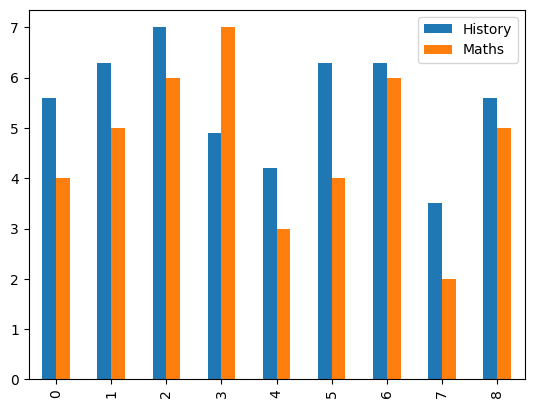

In [1916]:
df[["History","Maths"]].plot(kind="bar")

<Axes: >

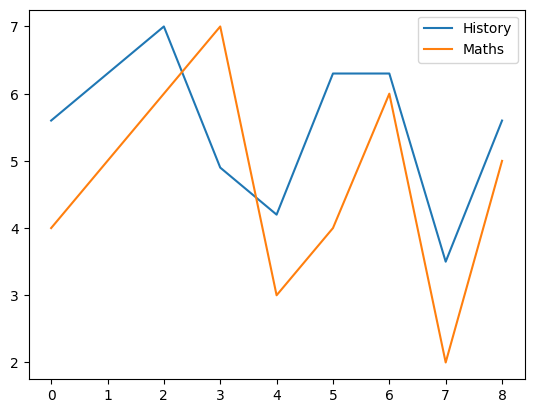

In [1917]:
df[["History","Maths"]].plot()

<Axes: >

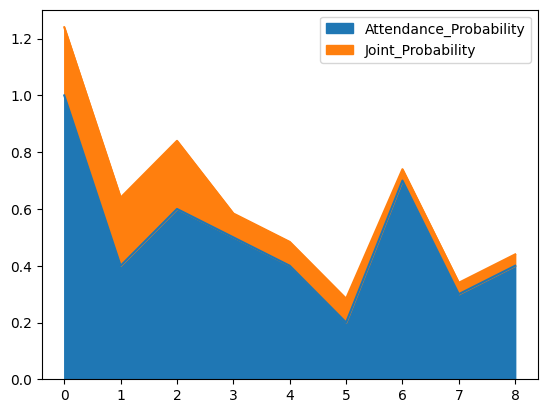

In [1918]:
df[["Attendance_Probability","Joint_Probability"]].plot.area()

<Axes: >

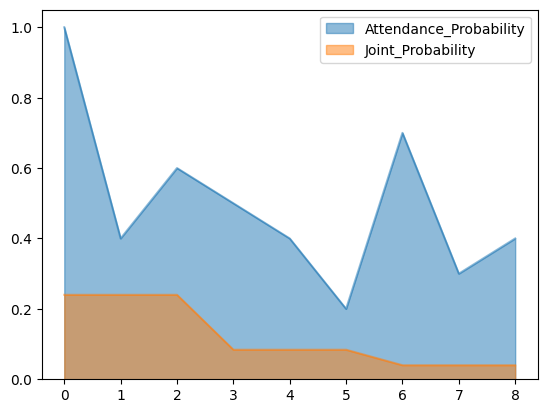

In [1919]:
df[["Attendance_Probability","Joint_Probability"]].plot.area(stacked=False)

<Axes: >

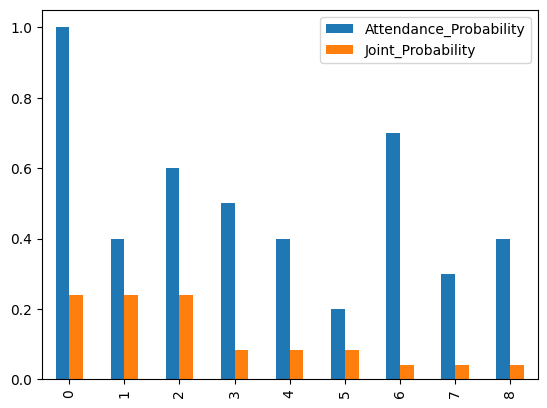

In [1920]:
df[["Attendance_Probability","Joint_Probability"]].plot.bar()

<Axes: >

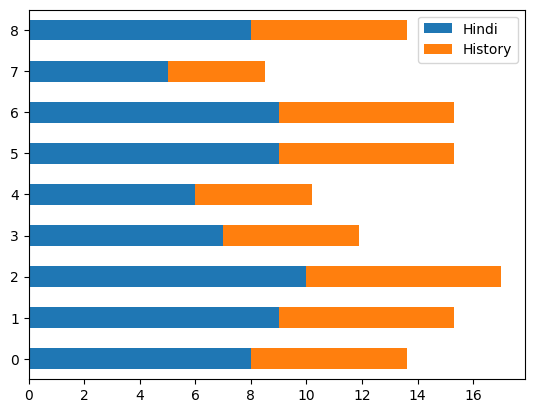

In [1921]:
df[["Hindi","History"]].plot.barh(stacked=True)

<Axes: >

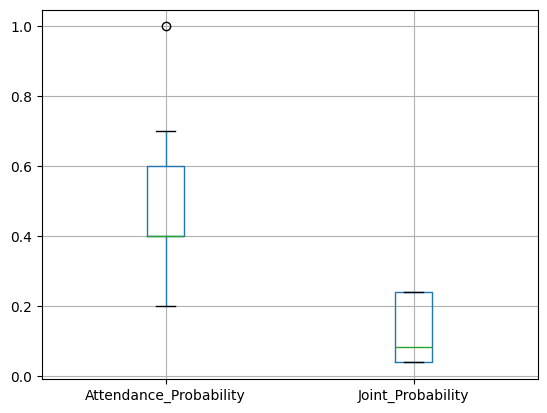

In [1922]:
df.iloc[:,4:-2].boxplot()

<Axes: ylabel='Density'>

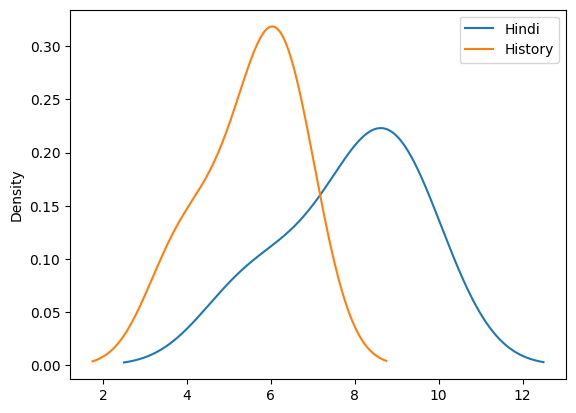

In [1923]:
df[["Hindi","History"]].plot.kde()

<Axes: xlabel='Maths', ylabel='Hindi'>

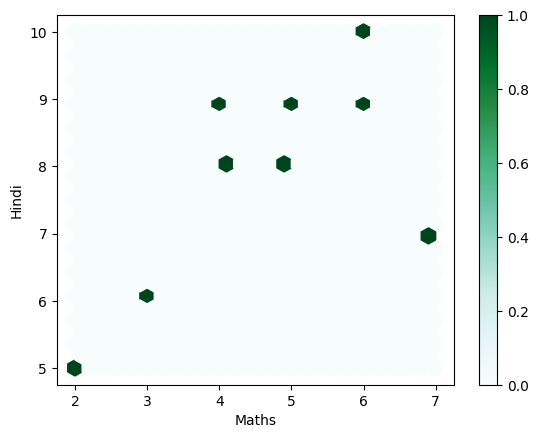

In [1924]:
df.plot.hexbin(x='Maths',y='Hindi',gridsize=25)

<Axes: xlabel='Maths', ylabel='Hindi'>

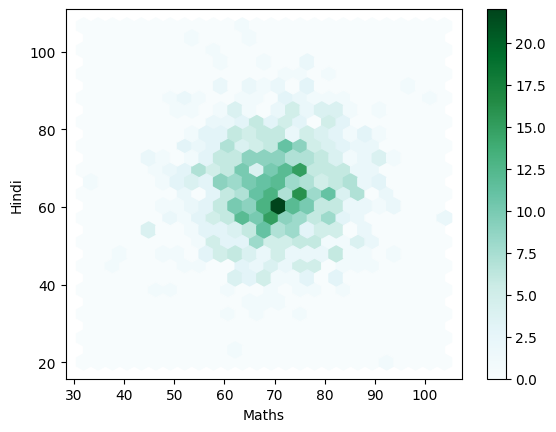

In [1925]:
# subs to scatterplot
dff = pd.DataFrame({
    'Maths': np.random.normal(70, 10, 1000),
    'Hindi': np.random.normal(65, 12, 1000)
})
dff.plot.hexbin(x='Maths',y='Hindi',gridsize=25)

<Axes: ylabel='Frequency'>

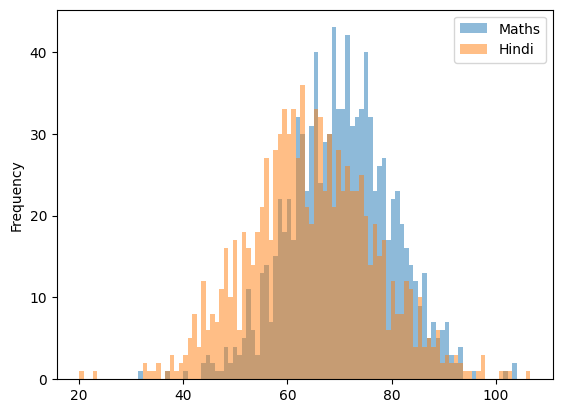

In [1926]:
dff.plot.hist(bins=100, alpha=0.5)

array([<Axes: >, <Axes: >], dtype=object)

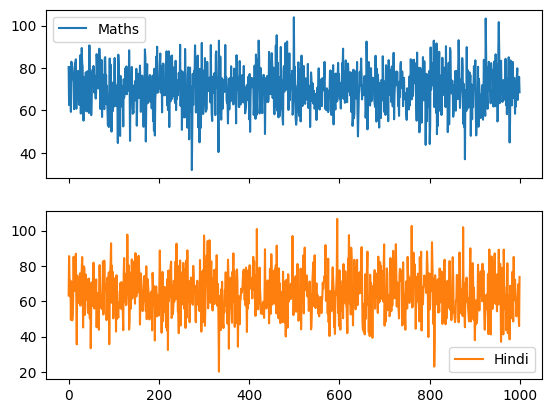

In [1927]:
dff.plot.line(subplots=True)

<Axes: xlabel='Hindi', ylabel='Maths'>

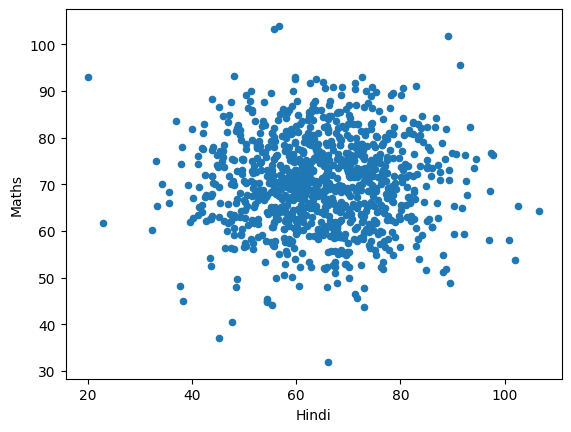

In [1935]:
dff.plot.scatter(x="Hindi",y="Maths")

array([<Axes: ylabel='mass'>, <Axes: ylabel='radius'>], dtype=object)

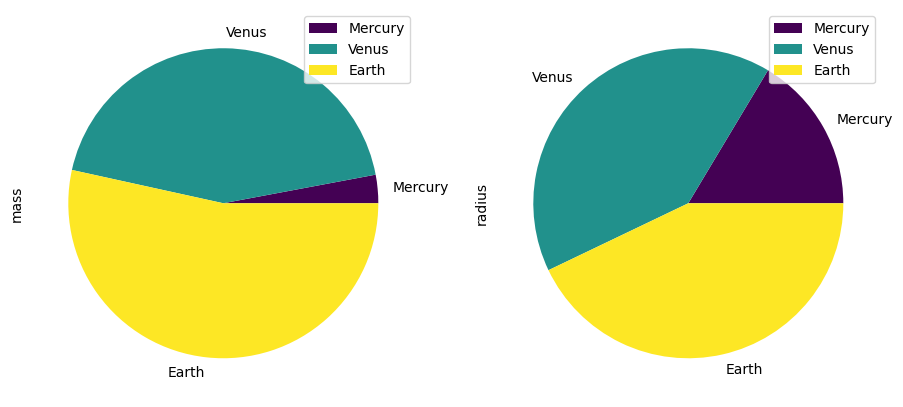

In [1936]:
dff = pd.DataFrame({'mass': [0.330, 4.87 , 5.97],
                   'radius': [2439.7, 6051.8, 6378.1]},
                  index=['Mercury', 'Venus', 'Earth'])
dff.plot.pie(subplots=True, figsize=(11, 6), cmap='viridis')

In [1937]:
df = pd.DataFrame({"A": pd.arrays.SparseArray([0, 1, 0, 1])})
df.sparse.density

np.float64(0.5)

In [ ]:
# n numbers file formats to write to and read from
# csv, hdf, pickle, parquet, orc, excel, json, html, latex,etc etc

In [ ]:
pd.set_option('display.max_columns', 4)

In [ ]:
pd.reset_option('display.max_columns')